# 基礎班提問 13:30

# 影像班提問 14:30

# 綜合提問 15:30

# dash 練習

In [9]:
csv_file = 'https://raw.githubusercontent.com/plotly/datasets/master/solar.csv'

# 影像處理練習

## image convolution

In [10]:
!curl -O "https://upload.wikimedia.org/wikipedia/commons/f/f4/Noise_salt_and_pepper.png"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 82829  100 82829    0     0   171k      0 --:--:-- --:--:-- --:--:--  172k


In [11]:
!curl -O "https://upload.wikimedia.org/wikipedia/commons/d/d2/512x512-Gaussian-Noise.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 89 88488   89 79128    0     0   163k      0 --:--:-- --:--:-- --:--:--  164k
100 88488  100 88488    0     0   180k      0 --:--:-- --:--:-- --:--:--  181k


In [12]:
!curl -O "https://upload.wikimedia.org/wikipedia/en/0/0a/Locator_Grid_double_size.png"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  7467  100  7467    0     0  27584      0 --:--:-- --:--:-- --:--:-- 28071


In [13]:
import numpy as np

In [17]:
matrix33 = np.arange(9)
matrix33.shape = (3, 3)
matrix33

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

### 怎麼取得總合

In [19]:
matrix33.sum()

36

In [20]:
np.sum(matrix33)

36

### 怎麼取得平均值

In [21]:
matrix33.mean()

4.0

In [22]:
np.mean(matrix33)

4.0

In [28]:
np.sum(matrix33 / len(matrix33.ravel()))

4.0

In [38]:
kernel = np.ones_like(matrix33)
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [36]:
np.sum(matrix33 * kernel / len(kernel.ravel())

3.9999999999999996

## 4 x 4 的影像, 要怎麼做 mean filtering

In [53]:
matrix44 = np.arange(4*4)
matrix44.shape = (4,4)
matrix44

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [54]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [55]:
matrix44[0:3, 0:3]

array([[ 0,  1,  2],
       [ 4,  5,  6],
       [ 8,  9, 10]])

In [56]:
np.sum(matrix44[0:3, 0:3] * kernel / 9)

5.0

In [57]:
np.array([
    [np.sum(matrix44[0:3, 0:3] * kernel / 9), np.sum(matrix44[0:3, 1:4] * kernel / 9)],
    [np.sum(matrix44[1:4, 0:3] * kernel / 9), np.sum(matrix44[1:4, 1:4] * kernel / 9)]])

array([[ 5.,  6.],
       [ 9., 10.]])

In [58]:
from scipy import ndimage

In [59]:
ndimage.convolve(matrix55, kernel) / 9

array([[ 1.66666667,  2.33333333,  3.33333333,  4.        ],
       [ 4.33333333,  5.        ,  6.        ,  6.66666667],
       [ 8.33333333,  9.        , 10.        , 10.66666667],
       [11.        , 11.66666667, 12.66666667, 13.33333333]])

### mean filtering

In [64]:
import cv2
import plotly.express as px

In [70]:
salt_pepper = cv2.imread('Noise_salt_and_pepper.png', cv2.IMREAD_GRAYSCALE)
px.imshow(salt_pepper, color_continuous_scale='gray')

In [77]:
mean_salt_pepper = ndimage.convolve(salt_pepper, kernel / kernel.sum())
px.imshow(mean_salt_pepper, color_continuous_scale='gray')

In [78]:
import matplotlib.pyplot as plt

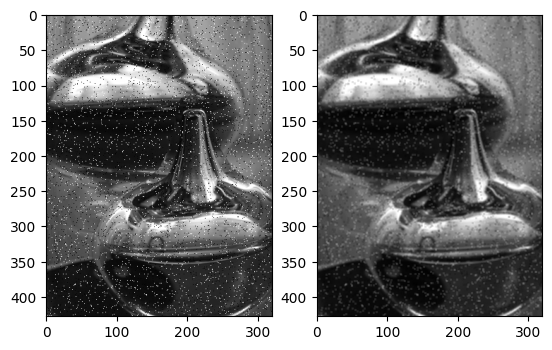

In [81]:
plt.subplot(1, 2, 1)
plt.imshow(salt_pepper, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(mean_salt_pepper, cmap='gray')